<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot.
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [1]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [3]:
image = np.array(Image.open('lemon.jpeg'))

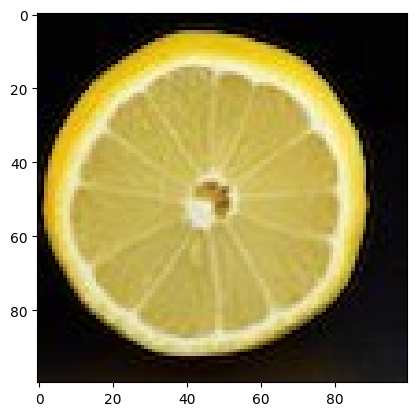

In [4]:
#Show original image
#I have changed the location to the same directory to be easier to work with
plt.imshow(image)

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





Shape of full image:  (100, 100, 3)
Shape of single channel: (100, 100)


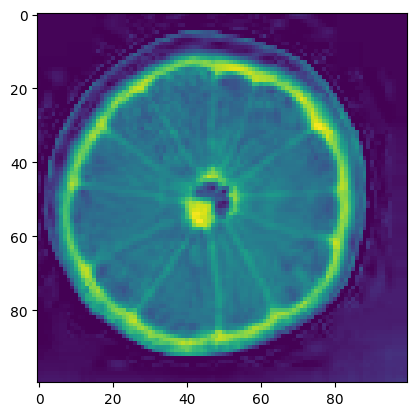

In [8]:
#1. Print shape of lemon image
print("Shape of full image: ", image.shape)

#2. Variable img_single_channel to just be last color channel, the 3rd part 100x100 of image
img_single_channel  = image[:,:,2]

#3. Shape of single channel, should be same 100x100 image size, but single
print("Shape of single channel:", img_single_channel.shape)

#4. Show image of single channel
plt.imshow(img_single_channel)

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

The average channel shape: (100, 100)


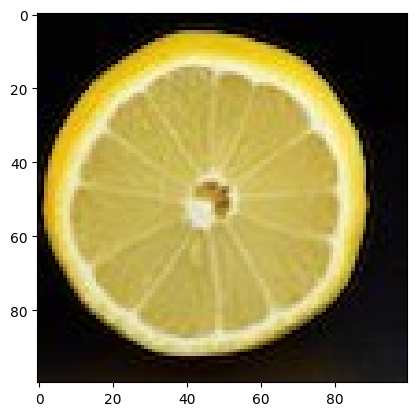

In [24]:
#1. Average channel just average of all three channels
# The choice of axis tell numpy to calculate along the channels
# Mean function with no axis input calculates the mean across the flattened array
# Axis of 0 calculates the mean down the rows, and axis 1 along the columns, axis 2 along the channels
img_average_channel  = np.mean(image, axis=2)

#2. The shape of the average channel image
print("The average channel shape:", img_average_channel.shape)

#3. Showing the orginal image, comparisons
plt.imshow(image)

'''
 Using imshow on image draws the original image, and the results of part 1 is
 the values of the single channel. The original image is of course the most detailed
 and all of the color values are kept and interpreted correctly using the imshow function.

 Assuming this meant showing the average channel image in comparison to part 1,
 Below I have shown the image of the average channel varible img_average_channel
 also, which looks similar to the result of Part 1 but seems to keep more detail.
 Comparing this to the single_channel result I would say the average channel image is better.
 For example the single channel loses values in the lemon peel and seems darker overall.
 Since single_channel keeps values from the one channel, and the lemon so strongly yellow,
 the dominating values would be in R and G since the color values for yellow
 are mostly high in R and G channels.
 The average channel image keeps more values among all parts of the image.
'''


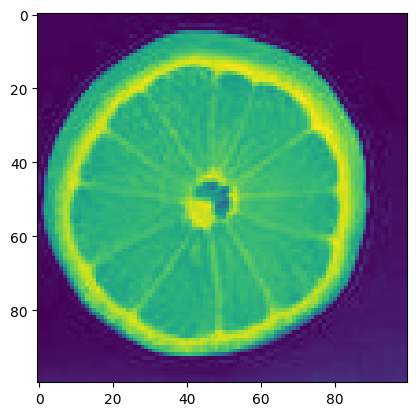

In [171]:
#Showing the average channel image
plt.imshow(img_average_channel)

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

In [172]:
#1. An identity matrix is a square matrix that has ones all along its main diagonal,
# from top left to bottom right.
#Multiplying a matrix with an identity matrix keeps the original matrix being multiplied the same

#2. Identity matrix with the same size as average channel image:
# Can use numpy identity function or eye function ( ex np.identity(N=100))
# Since img_average_channel is a square matrix its ok to make call this way for a square matrix
identity_matrix = np.eye(img_average_channel.shape[0])
print("The shape of I matrix ",identity_matrix.shape)
print(identity_matrix)

#3 A random row from identity matrix
random_index = np.random.randint(0,100)
random_row =  identity_matrix[ random_index ]
print("The row at the random value ", random_index, " is ", random_row)

#You can observe the random row at index 'i' printed is 100 values long and contains only a single 1 at the
# 'i'th place.


The shape of I matrix  (100, 100)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
The row at the random value  1  is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`.

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [173]:
# 1. Array with the numbers 0,1,...,N where N is the number of rows in the image
# the number of rows is 100, the N shape length is 100, the indexes go from 0,...,99
N = image.shape[0] #getting the number of rows in the image
print(N)
rows = np.arange(N) #numpy arange function makes these numbers up to N-1, so +1 would include N
#printing rows values before shuffling
print(rows)

#2. Making the shuffled array into rows, the shuffle function operates in place
np.random.shuffle(rows)

#3. Printing rows
print(rows)
#This array contains the values 0,1,...,N but shuffled around randomly.

100
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[15  9 81 49 25 85 11 18 60 71 93 29 86 23 89 19  4 99 44 43 37 40 14 21
 17 39 63 73 28 82 80 34 65 95  3 67 70 47 38 96 52 79 72 84  0 35 75 98
 24 13 74 88 45 54 66  8 62 53 50 59 27 58 41 97 83 76 69 30 48  6 42 68
 12 22 26 92 94 16 91  2 87 36 46 33 10 51 55 20  1 61 57 77 78 31  5 32
 90  7 56 64]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [174]:
#1. Using rows array of row indices to make a new matrix using those
# numpy allows a new matrix to be declared based on this input array of indexes
T = identity_matrix[rows]

# Print an example row from T
print(T[5])

#2. The T matrix is a randomized transformation matrix, that was originally the identity matrix.
# Each row still has the unit 1 in a unique place in each row.
# Multiplying another matrix with this one will have an effect of rearranging rows.
# So each row  in T is the randomized reordering of each row in the identity matrix
# So each row is unique and has only a 1 based on the row from the random row indices.

#3. Size of T, should be 100,100 same as identity_matrix and average_channel
print("The size of T: ", T.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
The size of T:  (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see.
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image.

Result shape: (100, 100)


"\nWhen doing T@img Each dot product between the rows of T and the column of the image matrix\nis taking the unit value found in the row of T with the corresponding column values of img.\nThe value in the 'i'th row and 'j'th col of the result is calculated by doing the dot product of the \nall the values of the  'i'th row of T with the 'j'th column values of \n\n"

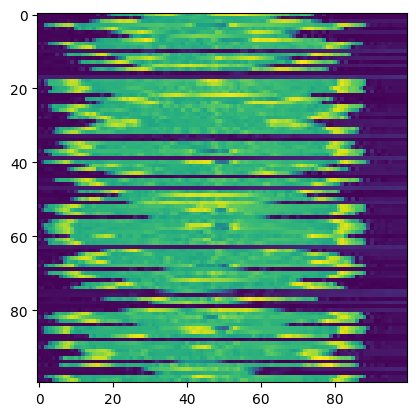

In [175]:
#1. Transforming the average channel image based on T, and storing.
#Using matrix mult operator @  equal operation is np.dot of two matrices
transformed_image = T@img_average_channel
#Checking the shape of the result
print("Result shape:",transformed_image.shape)

#2. Plotting transformed image
# The image is clearly a random reordering of the visual rows of the original
# This is the result of T@img_average which takes the order of the rows in T
# and puts the values of img in each row of T corresponding to the 1 in T.
# Doing img@T would have the effect of shuffling the columns
plt.imshow(transformed_image)

#3. The transformation operation:
'''
When doing T@img Each dot product between the rows of T and the column of the image matrix
is taking the unit value found in the row of T with the corresponding column values of img.
The value in the 'i'th row and 'j'th col of the result is calculated by doing the dot product of the
all the values of the  'i'th row of T with the 'j'th column values of

'''


In [176]:
#Doing an example matmul to check results
#For our examples imagine A would be an image and T the shuffled Identity matrix T
A = np.array( [[1,2,3],[4,5,6],[7,8,9]])
Tex = np.array( [[0,0,1],[1,0,0],[0,1,0]])
print("Original image 'A' \n"   , A)
print("Transformed image 'A' \n", Tex@A)

Original image 'A' 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Transformed image 'A' 
 [[7 8 9]
 [1 2 3]
 [4 5 6]]


## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

(100, 100) 1.0
(100, 100)


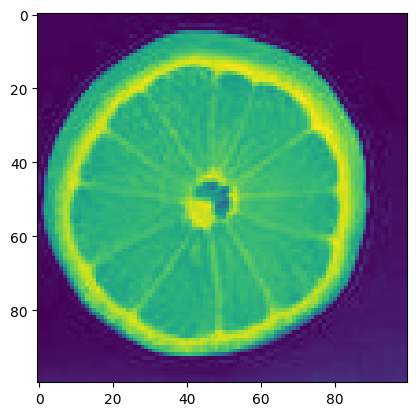

In [180]:
#1. Finding if a matrix is invertible
# A matrix is invertible if there is another matrix such that matmul AB and BA is the identity I
# A straightforward way to check for invertibility is to calculate the determinant.
# A nonzero determinant means a matrix is invertible maybe.
determinant = np.linalg.det(T)
print(T.shape, determinant)

#2. Computing the inverse matrix Tinv
Tinv = np.linalg.inv(T)

#3. Inverse scrambling operation, the original image is retrieved
print(Tinv.shape)
unscrambled_img = Tinv@transformed_image
plt.imshow(unscrambled_img)

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


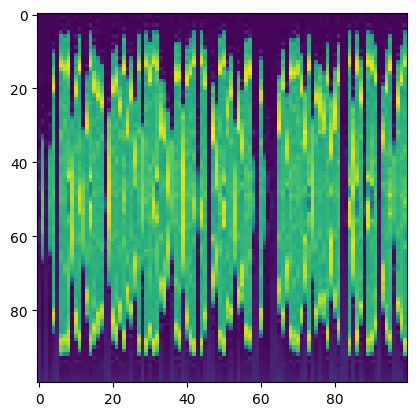

In [110]:
columns_image = img_average_channel@T
plt.imshow(columns_image)

## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image.

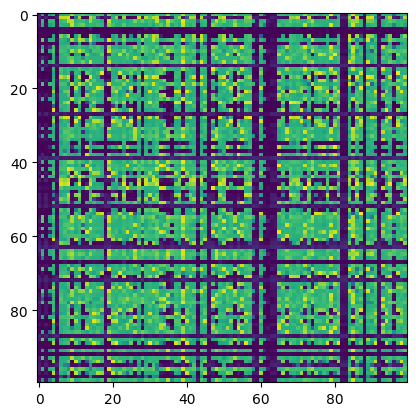

In [111]:
both_image = T@img_average_channel@T
plt.imshow(both_image)

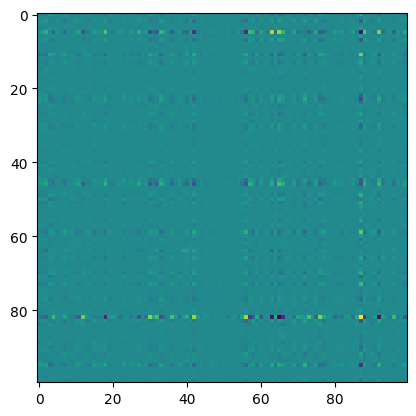

In [123]:
recovered_image = np.linalg.inv(both_image)
plt.imshow(recovered_image)